## K-means Cluster Analysis

#### We will use mall customer data to identify customer segment using K-Means Clustering. Using cluster analysis to segment customers can help to understand the features that differetiate customers segment and help marketing team to plan the marketing strategies.

#### Variables

CustomerID: Unique ID assigned to the customer.

Gender: Gender of the customer.

Age: Age of the customer.

Annual_Income (k$): Annual Income of the customer.

Spending_Score (1-100): Score assigned by the mall based on customer behavior and spending nature.


### Step 1: Read and preprocess the data

In [ ]:
import pandas as pd

# work with colab
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/My Drive/CIS 412 Session C/Datafiles/mall_customers.csv'
customer = pd.read_csv(path)

Mounted at /content/drive


In [ ]:
customer

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
customer.rename(columns= {"Genre":"Gender"}, inplace= True)
customer

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
# select numerical columns that are used to perform K-means cluster analysis
X= customer.iloc[:, [3,4]].values
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [ ]:
# standardize features
from sklearn.preprocessing import StandardScaler

#create a scaler
scaler = StandardScaler()

# Apply the scaler
customer_std = scaler.fit_transform(X)
customer_std

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002],
       [-1.58632148, -1.4053405 ],
       [-1.58632148,  1.89449216],
       [-1.54815205, -1.36651894],
       [-1.54815205,  1.04041783],
       [-1.54815205, -1.44416206],
       [-1.54815205,  1.11806095],
       [-1.50998262, -0.59008772],
       [-1.50998262,  0.61338066],
       [-1.43364376, -0.82301709],
       [-1.43364376,  1.8556706 ],
       [-1.39547433, -0.59008772],
       [-1.39547433,  0.88513158],
       [-1.3573049 , -1.75473454],
       [-1.3573049 ,  0.88513158],
       [-1.24279661, -1.4053405 ],
       [-1.24279661,  1.23452563],
       [-1.24279661, -0.7065524 ],
       [-1.24279661,  0.41927286],
       [-1.20462718,

### Step 2: Perform K-means cluster analysis

In [ ]:
# import library
from sklearn.cluster import KMeans


In [ ]:
# use elbow method to find the optimal k

wcss=[]
for i in range(2,11):
     kmeans = KMeans(n_clusters=i, n_init=10, max_iter=300, random_state=0)
     kmeans.fit(customer_std)
     wcss.append(kmeans.inertia_)


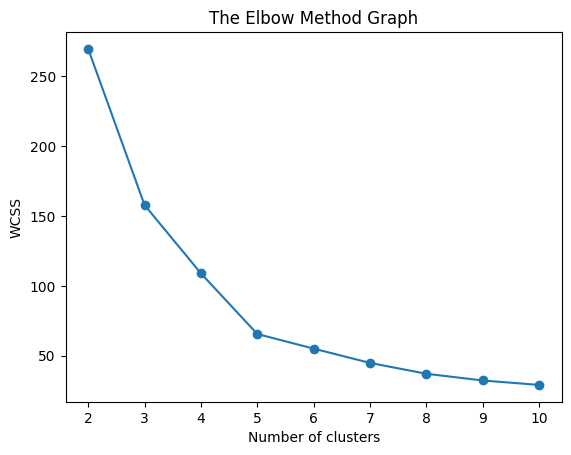

In [ ]:
# visualize the elbow visualization
import matplotlib.pyplot as plt
plt.plot(range(2,11),wcss, marker = "o")
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# This is another way to find the optimal k using silhouette score, we look at the k that gives us the highest silhouette_score
from sklearn.metrics import silhouette_score

for n_cluster in [4,5,6,7,8,9,10]:
    kmeans = KMeans(n_clusters=n_cluster).fit(customer_std)

    silhouette_avg = silhouette_score(
        customer_std,
        kmeans.labels_)

    print('Silhouette Score for %i Clusters: %0.4f' % (n_cluster, silhouette_avg))

Silhouette Score for 4 Clusters: 0.4376
Silhouette Score for 5 Clusters: 0.5547
Silhouette Score for 6 Clusters: 0.5432
Silhouette Score for 7 Clusters: 0.5034
Silhouette Score for 8 Clusters: 0.4798
Silhouette Score for 9 Clusters: 0.4332
Silhouette Score for 10 Clusters: 0.4408


In [ ]:
#perform k means cluster analysis using 5 clusters
km = KMeans(n_clusters= 5, n_init= 10, max_iter= 300, random_state= 0).fit(customer_std)
#km.fit(customer_std)

In [ ]:
#assign data points to clusters
clusters = km.fit_predict(customer_std)
clusters

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0,
       3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

In [ ]:
#create a new column called 'label' to save clusters in the dataset
customer['label'] = clusters
customer

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,1,Male,19,15,39,3
1,2,Male,21,15,81,4
2,3,Female,20,16,6,3
3,4,Female,23,16,77,4
4,5,Female,31,17,40,3
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,2
197,198,Male,32,126,74,1
198,199,Male,32,137,18,2


### Step 3: Interpret and visualize the clusters

In [ ]:
# create a dataframe to save the centroids for the clusters in terms of Annual Income and Spending Score
centroids = pd.DataFrame(km.cluster_centers_, columns = ['Annual Income (k$)','Spending Score (1-100)'])
centroids


,Annual Income (k$),Spending Score (1-100)
0,-0.200913,-0.026456
1,0.991583,1.239503
2,1.055003,-1.284439
3,-1.307519,-1.136965
4,-1.329545,1.132178


In [ ]:
# add a new column called "cluster" to indicate the index of the clusters for each set of the centroids
centroids['cluster'] = ['Cluster {}'.format(i) for i in centroids.index]
centroids

,Annual Income (k$),Spending Score (1-100),cluster
0,-0.200913,-0.026456,Cluster 0
1,0.991583,1.239503,Cluster 1
2,1.055003,-1.284439,Cluster 2
3,-1.307519,-1.136965,Cluster 3
4,-1.329545,1.132178,Cluster 4


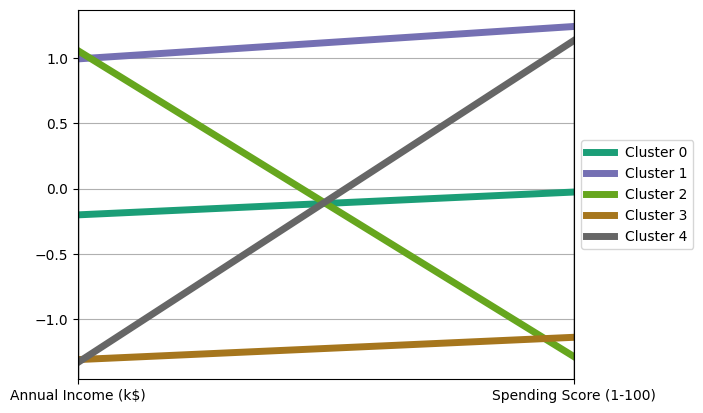

In [ ]:
# create parallel coordinates to visualize the centroids for each cluster


#import library
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates

#parallel coordinates visualization
#plt.figure(figsize=(10,5))
parallel_coordinates(centroids, class_column='cluster', colormap='Dark2', linewidth=5)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))


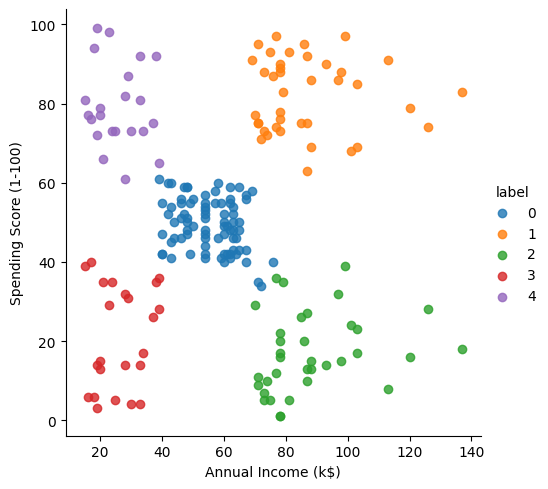

In [ ]:
#visualize the clusters using two variables Annual Income and Spending Score

import seaborn as sns
sns.lmplot(data=customer, x='Annual Income (k$)', y='Spending Score (1-100)', hue='label',
           fit_reg=False,legend=True)
